In [1]:
# Data lib
import pandas as pd
import numpy as np

# Viz lib
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/power_consumption_project/power_cons_data_clean.csv', parse_dates=['Date_time'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Date_time              datetime64[ns]
 8   Year                   int64         
 9   Month                  int64         
 10  Week_num               int64         
 11  Month_day              int64         
 12  Week_day               int64         
 13  Year_day               int64         
 14  Hour                   int64         
 15  Season                 int64         
dtypes: datetime64[ns](1), float64(7), int64(8)
memory usage: 253.3 MB


In [10]:
# Def function - Line plot
def line_subplots(data, plot_name):
    '''Template for Line subplots combined of 4 plots for
    Yearly/Month/Weekly/Daily/Hourly data'''
    # Create traces
    traces1={}
    traces2={}
    traces3={}
    traces4={}
    for col in data.columns:
        traces1[col] = go.Scatter(x=data.iloc[:,0], y=data.iloc[:,1])
        traces2[col] = go.Scatter(x=data.iloc[:,0], y=data.iloc[:,2])
        traces3[col] = go.Scatter(x=data.iloc[:,0], y=data.iloc[:,3])
        traces4[col] = go.Scatter(x=data.iloc[:,0], y=data.iloc[:,4])   

        # Adjusting the settings for the subplots
        fig = make_subplots(rows=4, 
                            cols=1,
                            vertical_spacing=0.05, shared_xaxes=True, 
                            subplot_titles=(data.columns.values[1],
                                            data.columns.values[2],
                                            data.columns.values[3],
                                            data.columns.values[4]))

        # Appending each trace to corresponding place
        fig.append_trace(traces1[col], 1,1)
        fig.append_trace(traces2[col], 2,1)
        fig.append_trace(traces3[col], 3,1)
        fig.append_trace(traces4[col], 4,1)
    
    # Setting the names of y axes for each plot
    fig.update_yaxes(title_text="Power <b>[kW]</b>", row=1, col=1)
    fig.update_yaxes(title_text="Power <b>[kW]</b>", row=2, col=1)
    fig.update_yaxes(title_text="Voltage <b>[V]</b>", row=3, col=1, range=[0,300])
    fig.update_yaxes(title_text="Ampers <b>[A]</b>", row=4, col=1, range=[0,10])

    # Setting the grid lines and their colors
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#33658A')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#3d405b')

    # Fixing the tickval on the x axes
    fig.update_xaxes(tickfont=dict(size=10), tickvals=data.iloc[:,0])

    # Settting the name of the x axes
    fig.update_xaxes(title_text=data.columns.values[0], row=4, col=1)

    # Setting the layout
    fig.update_layout(showlegend=False,
                      title_text=plot_name,
                      height=800,
                      plot_bgcolor='#3d405b',
                      paper_bgcolor='#edf6f9',
                      yaxis=dict(showgrid=True))
    
    fig.show()

In [11]:
# Create new df based on yearly interval which includes the Mean of each attributes
data_year = data.groupby('Year').agg({'Global_active_power':'mean', 
                                    'Global_reactive_power':'mean',
                                    'Voltage':'mean',
                                    'Global_intensity':'mean'}).reset_index()

line_subplots(data=data_year, plot_name='<b>Total Yearly</b> usage of Power')

In [12]:
# Create new df based on Season interval which includes the Mean of each attributes
data_season = data.groupby('Season').agg({'Global_active_power':'mean',
                                    'Global_reactive_power':'mean',
                                    'Voltage':'mean',
                                    'Global_intensity':'mean'}).reset_index()

line_subplots(data=data_season, plot_name='<b>Season average</b> usage of Power')

In [13]:
# Create new df based on Monthly interval which includes the Mean of each attributes
data_month = data.groupby('Month').agg({'Global_active_power':'mean',
                                    'Global_reactive_power':'mean',
                                    'Voltage':'mean',
                                    'Global_intensity':'mean'}).reset_index()

line_subplots(data=data_month, plot_name='<b>Monthly average</b> usage of Power')

In [14]:
# Create new df based on Weekly interval which includes the Mean of each attributes
data_week = data.groupby('Week_num').agg({'Global_active_power':'mean',
                                    'Global_reactive_power':'mean',
                                    'Voltage':'mean',
                                    'Global_intensity':'mean'}).reset_index()

line_subplots(data=data_week, plot_name='<b>Weekly average</b> usage of Power')

In [15]:
# Create new df based on Daily interval which includes the Mean of each attributes
data_day = data.groupby('Month_day').agg({'Global_active_power':'mean',
                                    'Global_reactive_power':'mean',
                                    'Voltage':'mean',
                                    'Global_intensity':'mean'}).reset_index()

line_subplots(data=data_day, plot_name='<b>Daily average</b> usage of Power')

In [16]:
# Create new df based on Hourly interval which includes the Mean of each attributes
data_hour = data.groupby('Week_day').agg({'Global_active_power':'mean',
                                    'Global_reactive_power':'mean',
                                    'Voltage':'mean',
                                    'Global_intensity':'mean'}).reset_index()

line_subplots(data=data_hour, plot_name='<b>Monday to Sunday average</b> usage of Power')

In [17]:
# Create new df based on Hourly interval which includes the Mean of each attributes
data_hour = data.groupby('Hour').agg({'Global_active_power':'mean',
                                    'Global_reactive_power':'mean',
                                    'Voltage':'mean',
                                    'Global_intensity':'mean'}).reset_index()

line_subplots(data=data_hour, plot_name='<b>Hourly average</b> usage of Power')

In [18]:
# Def function - Single line plot
def scatter_plot(data, plot_name):
    '''Single scatter plot'''

    # Adjusting the settings for the subplots
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.iloc[:,0], y=data.iloc[:,1]))
    
    # Setting the names of y axes for each plot
    fig.update_yaxes(title_text="Power <b>[kW]</b>")

    # Setting the grid lines and their colors
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#33658A')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#3d405b')

    # Fixing the tickval on the x axes
    fig.update_xaxes(tickfont=dict(size=10))

    # Settting the name of the x axes
    fig.update_xaxes(title_text=data.columns.values[0])

    # Setting the layout
    fig.update_layout(showlegend=False,
                      title_text=plot_name, 
                      plot_bgcolor='#3d405b', 
                      paper_bgcolor='#edf6f9',
                      yaxis=dict(showgrid=True))
    
    fig.show()

In [19]:
# Create new df based on yearly interval which includes the Mean of each attributes
data_daily_year = data.groupby(pd.Grouper(key='Date_time', freq='D')).agg({'Global_active_power':'sum'}).reset_index()

scatter_plot(data=data_daily_year, plot_name='Total Active Power on Daily interval')

In [20]:
# Create new df based on yearly interval which includes the Mean of each attributes
data_weekly_year = data.groupby(pd.Grouper(key='Date_time', freq='W')).agg({'Global_active_power':'sum'}).reset_index()

scatter_plot(data=data_weekly_year, plot_name='Total Active Power on Weekly interval')

In [21]:
# Create new df based on yearly interval which includes the Mean of each attributes
data_monthly_year = data.groupby(pd.Grouper(key='Date_time', freq='M')).agg({'Global_active_power':'sum'}).reset_index()

scatter_plot(data=data_monthly_year, plot_name='Total Active Power on Monthly interval')

In [22]:
data_sub_meter = data.groupby(pd.Grouper(key='Date_time', freq='M')).agg({'Sub_metering_1':'sum', 
                                                                          'Sub_metering_2':'sum', 
                                                                          'Sub_metering_3':'sum'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_sub_meter['Date_time'], 
                         y=data_sub_meter['Sub_metering_1'], 
                         name='Sub_1'))

fig.add_trace(go.Scatter(x=data_sub_meter['Date_time'], 
                         y=data_sub_meter['Sub_metering_2'], 
                         name='Sub_2'))

fig.add_trace(go.Scatter(x=data_sub_meter['Date_time'], 
                         y=data_sub_meter['Sub_metering_3'], 
                         name='Sub_3'))

# Setting the names of y axes for each plot
fig.update_yaxes(title_text="Watt-hour <b>[Wh]</b>")

# Setting the grid lines and their colors
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#33658A')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#3d405b')

# Fixing the tickval on the x axes
fig.update_xaxes(tickfont=dict(size=10))

# Setting the layout
fig.update_layout(title_text='Monthly Average of Sub_metering 1/2/3', 
                  plot_bgcolor='#3d405b', 
                  paper_bgcolor='#edf6f9',
                  yaxis=dict(showgrid=True))

fig.show()

In [23]:
data_sub_meter = data.groupby(pd.Grouper(key='Date_time', freq='M')).agg({'Sub_metering_3':'sum', 
                                                                          'Sub_metering_2':'sum', 
                                                                          'Sub_metering_1':'sum',
                                                                          'Global_active_power':'sum'}).reset_index()

# Adjusting the settings for the subplots
fig = make_subplots(specs=[[{'secondary_y':True}]])

fig.add_trace(go.Scatter(x=data_sub_meter['Date_time'], 
                         y=data_sub_meter['Sub_metering_3'], 
                         name='Sub_3'), secondary_y=False)

fig.add_trace(go.Scatter(x=data_sub_meter['Date_time'], 
                         y=data_sub_meter['Sub_metering_2'], 
                         name='Sub_2'), secondary_y=False)

fig.add_trace(go.Scatter(x=data_sub_meter['Date_time'], 
                         y=data_sub_meter['Sub_metering_1'], 
                         name='Sub_1'), secondary_y=False)

fig.add_trace(go.Scatter(x=data_sub_meter['Date_time'], 
                         y=data_sub_meter['Global_active_power'], 
                         name='Active Power'), secondary_y=True)

# Setting the names of y axes for each plot
fig.update_yaxes(title_text="Kilowat-hour <b>[kW]</b>", secondary_y=False)
fig.update_yaxes(title_text="Watt-hour <b>[Wh]</b>", secondary_y=True)

# Setting the grid lines and their colors
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#33658A')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#3d405b')

# Fixing the tickval on the x axes
fig.update_xaxes(tickfont=dict(size=10), title='Month')

# Setting the layout
fig.update_layout(title={'text':'Monthly Average of Sub_metering 1/2/3',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'}, 
                          autosize=True,
                          plot_bgcolor='#3d405b', 
                          paper_bgcolor='#edf6f9',
                          yaxis=dict(showgrid=True), 
                          legend=dict(orientation="h",
                                      yanchor="bottom",
                                      y=1, 
                                      xanchor="center",
                                      x=0.5))

fig.show()

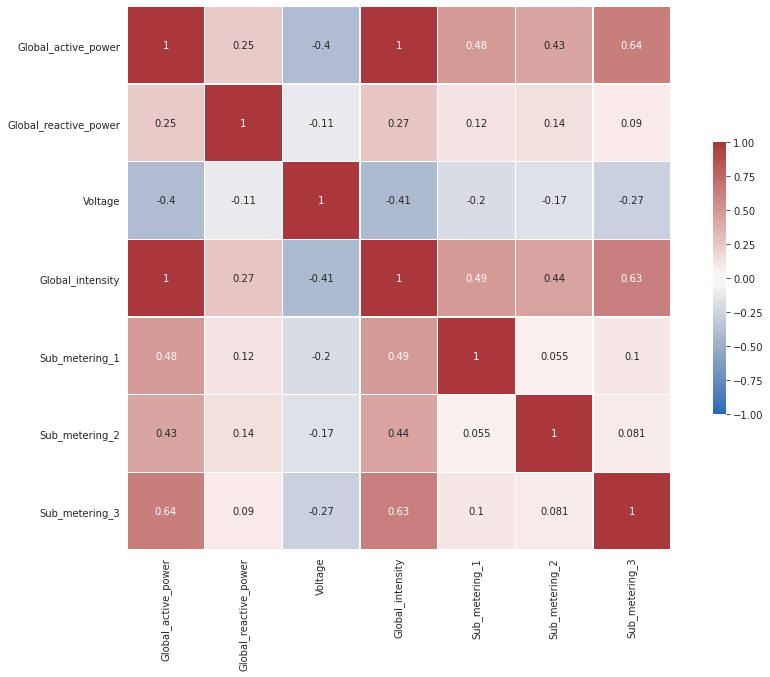

In [24]:
corr = data.iloc[:, :7].corr()
# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw correlation plot
sns.heatmap(corr, cmap='vlag', 
            square=True, linewidths=.5, fmt='.2g',
            annot=True, #annot_kws={'size':10},
            vmin=-1, vmax=1,
            cbar_kws={"shrink": .5}, ax=ax)

plt.show(sns)

In [25]:
data_daily = data.groupby(pd.Grouper(key='Date_time', freq='D')).agg({'Global_active_power':'sum', 
                                                                            'Sub_metering_1':'sum', 
                                                                            'Sub_metering_2':'sum', 
                                                                            'Sub_metering_3':'sum'}).reset_index()

In [26]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
fig.add_trace(go.Box(y=data_daily['Sub_metering_1'], 
                         name='Sub_1'), secondary_y=False)

fig.add_trace(go.Box(y=data_daily['Sub_metering_2'], 
                         name='Sub_2'), secondary_y=False)

fig.add_trace(go.Box(y=data_daily['Sub_metering_3'], 
                         name='Sub_3'), secondary_y=False)

fig.add_trace(go.Box(y=data_daily['Global_active_power'], 
                         name='Active Power'), secondary_y=True)

# Setting the names of y axes for each plot
fig.update_yaxes(title_text="Watt-hour <b>[Wh]</b>")
fig.update_yaxes(title_text="Kilowatt <b>[kW]</b>", secondary_y=True)

# Setting the grid lines and their colors
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='#33658A')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#3d405b')

# Fixing the tickval on the x axes
fig.update_xaxes(tickfont=dict(size=10))

# Setting the layout
fig.update_layout(title_text='Sub Metering and Active Power Averages', 
                  plot_bgcolor='#3d405b', 
                  paper_bgcolor='#edf6f9',
                  autosize=True,
                  yaxis=dict(showgrid=True),
                  legend=dict(orientation="h",
                  yanchor="bottom",
                  y=1,
                  xanchor="center",
                  x=0.5))

fig.show()

In [27]:
import plotly.figure_factory as ff

hist_data = [data_daily['Global_active_power'], 
             data_daily['Sub_metering_1'], 
             data_daily['Sub_metering_2'], 
             data_daily['Sub_metering_3']]

group_labels = ['Active Power', 'Sub 1', 'Sub 2', 'Sub 3']
colors = ['#A56CC1', '#A6ACEC', '#63F5EF', '#F66095']

fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=500, show_rug=False)

fig.show()

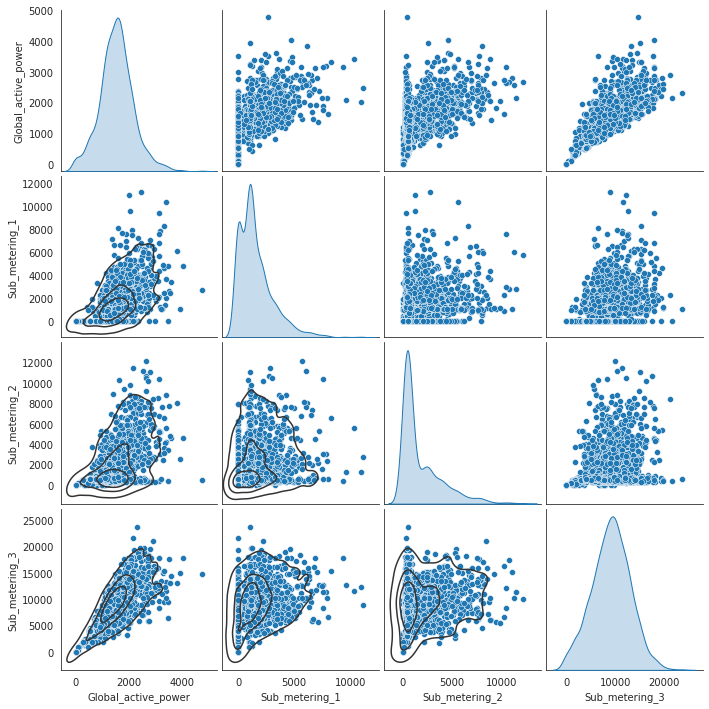

In [28]:
g = sns.pairplot(data_daily, diag_kind = 'kde')

g.map_lower(sns.kdeplot, levels=4, color='.2')

plt.show()

In [29]:
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='Global Active Power',
                                 values=data_daily['Global_active_power']),
                            dict(label='Sub 1',
                                 values=data_daily['Sub_metering_1']),
                            dict(label='Sub 2',
                                 values=data_daily['Sub_metering_2']),
                            dict(label='Sub 3',
                                 values=data_daily['Sub_metering_3'])], 
                showupperhalf=False,
                marker=dict(
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='All attributes - Scatter plot',
    dragmode='select',
    width=600,
    height=600,
    hovermode='closest',
)

fig.show()

In [30]:
data_daily.describe()

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1457.000000,1457.000000,1457.000000,1457.000000
mean,1535.363666,1577.992450,1826.376802,9083.848318
std,633.773181,1587.823466,2087.133542,3880.630931
min,0.000000,0.000000,0.000000,0.000000
25%,1147.396000,437.000000,419.000000,6529.000000
50%,1528.760000,1106.000000,667.000000,9176.000000
75%,1885.964000,2187.000000,2686.000000,11679.000000
max,4773.386000,11178.000000,12109.000000,23743.000000
